In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def get_sin_sample(n=10, sigma=0.05, mean=0, xlim=(0,1), bins=None): # latin hypercube sampling
    if bins is None:
        bins = n
    
    step = (xlim[1] - xlim[0]) / bins
    k = int(np.ceil(n/bins))
    x = np.zeros(n)
    
    s = 0
    e = step
    pos = 0
    for i in range(0, bins):
        x[pos:pos+k] = np.random.uniform(s, e, k)
        s = e
        e += step
        pos += k
    
    last = n - bins
    if pos != n:
        x[pos:] = np.random.uniform(0, 1, n - pos)
    
    y = np.sin(2 * np.pi * x) 
    y_noised = y + np.random.normal(mean, sigma, n)
    return x, y_noised


In [3]:
n = 10
sigma = 0.15
mean = 0
x, y = get_sin_sample(n=10, mean=mean, sigma=sigma)


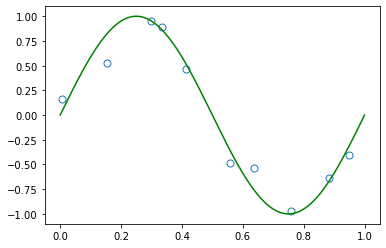

In [4]:
eps = 0.01
xlim = (0, 1)
plt.plot(x, y, marker='o', fillstyle='none', linestyle='none', markersize=7)
xsin = np.arange(xlim[0], xlim[1], (xlim[1] - xlim[0]) / 10000)
ysin = np.sin(2 * np.pi * xsin)
plt.plot(xsin, ysin, color='green')

In [5]:
def make_order_matrix(x, order): 
    # Делаем матрицу признаков. Каждой строке соответствует один объект, каждому столбцу - степень от 0 до order
    X = np.zeros((x.shape[0], order+1))
    X[:, 0] = 1
    X[:, 1] = x
    for i in range(2, order + 1):
        X[:, i] = x ** i
    return X 
    

In [6]:
order = 10

In [7]:
X= make_order_matrix(x, order)
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [8]:
X_grid = make_order_matrix(xsin, order)
y_grid_pred = model.predict(X_grid)

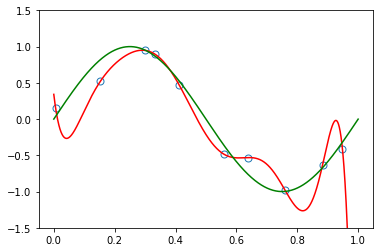

In [9]:
plt.ylim(-1.5, 1.5) # установить предел для оси OY
plt.plot(x, y, marker='o', fillstyle='none', linestyle='none', markersize=7)
plt.plot(xsin, y_grid_pred, color='red')
plt.plot(xsin, ysin, color='green')

Подсчет MSE и MAE

In [10]:
print (mean_squared_error(ysin, y_grid_pred), mean_absolute_error(ysin, y_grid_pred))

0.9285723381794485 0.3625735892422903


# Polyfit. Сравнение

In [11]:
# использование функции
p = np.poly1d(np.polyfit(x, y, order)) # аппроксимация y полиномом степени order от x 
y_pred = p(x)

/home/an/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


# Влияние размера выборки на переобучение

Проверьте, как будет влиять изменения размера выборки на переобучение

In [12]:
def get_LinearRegression(n=10, sigma=0.15, mean=0, order=10): 
    x, y = get_sin_sample(n=n, mean=mean, sigma=sigma)
    X = make_order_matrix(x, order)
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)
    
    xsin = np.arange(xlim[0], xlim[1], (xlim[1] - xlim[0]) / 10000)
    ysin = np.sin(2 * np.pi * xsin)
    
    X_grid = make_order_matrix(xsin, order)
    y_grid_pred = model.predict(X_grid)
    
    plt.ylim(-2, 2) 
    plt.plot(x, y, marker='+', fillstyle='none', linestyle='none', markersize=8)
    plt.plot(xsin, y_grid_pred, color='red', label='model')
    plt.plot(xsin, ysin, color='blue', label='predict function')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='lower left')

 Для приблежения функции возьмем полином 5 и 9 степени, а также возьмем две выборки 10 и 100 для сравнения.

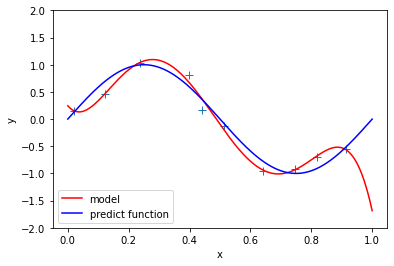

In [13]:
get_LinearRegression(n=10, order=5)

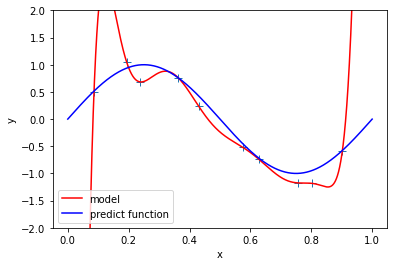

In [14]:
get_LinearRegression(n=10, order=9)

Как видно на втором графике при маленькой выборке и полином большой степени мы получаем переобучение.

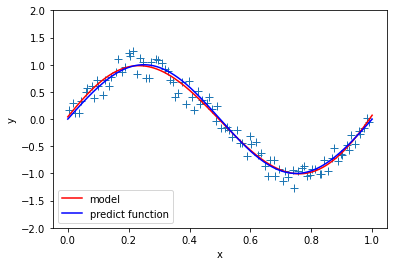

In [15]:
get_LinearRegression(n=100, order=5)

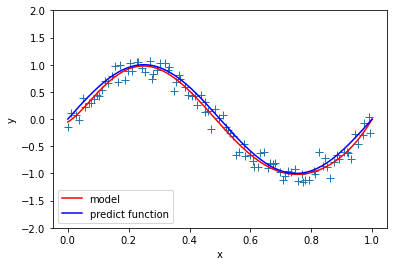

In [16]:
get_LinearRegression(n=100, order=9)

Как видно на графиках выше в сравнении с графиками с маленькой выборкой, переобучение уменьшается.

# Влияние дисперсии шума на переобучение

Проверьте, как будет влиять изменения дисперсии шума, добавляемого к реальным значениям y на переобучение

 Для приблежения функции возьмем полином 5 и возьмем две значения mean 0 и 1 для сравнения.

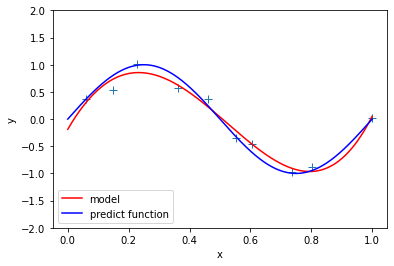

In [17]:
get_LinearRegression(n=10, order=4, mean=0.0)

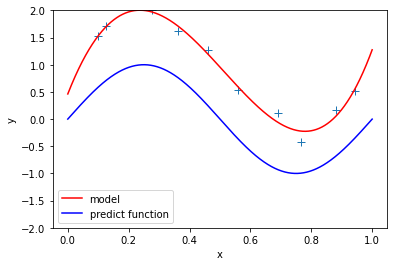

In [18]:
get_LinearRegression(n=10, order=4, mean=1)

Из графиков мы имеем  изменения mean  график сохраняет свою форму, но сдвигается  по оси у в нашем случае в среднем на 1.

# Влияние среднего шума на переобучение

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [20]:
np.random.seed(777)

# Проклятье размерности

##  Сэмплируем из многомерного нормального распределения. Построить распределение расстояния до нуля координат. 

In [21]:
np.random.normal(0, 1) # 0 среднее, 1 дисперсия, 1-мерное нормальное распределение

-0.4682087939185533

In [22]:
# 1 точка из 10мерного нормального распределения, все компоненты которого независимы
np.random.normal(0, 1, size=10) 

array([-0.82282485, -0.0653801 , -0.71336192,  0.90635089,  0.76623673,
        0.82605407, -1.32368279, -1.75244452,  1.00244907,  0.54480945])

In [23]:
# 5 njxrt из 10мерного нормального распределения, все компоненты которого независимы
np.random.normal(0, 1, 
                 size=(5, 10)) 

array([[ 1.8951609 , -0.76935745, -1.40309592, -0.63246751, -0.55887367,
        -1.23323138, -0.43950352,  0.91478726,  0.26504093, -1.38337015],
       [ 0.6855118 ,  0.45609091, -0.46137426,  0.0947003 , -1.54281161,
         2.4793696 ,  0.45686676, -0.31387278,  0.02103738,  0.96079316],
       [ 0.0584829 , -0.44603217,  0.31919714,  0.84116862, -1.53276199,
        -0.28158426,  1.74445271, -0.67423891,  0.58840123,  1.80436346],
       [ 2.05625026,  1.45458168, -0.13841169,  0.34287188, -0.72761848,
        -1.4039461 , -1.24061119, -0.44348217, -0.04732516,  0.75768436],
       [-0.15208593, -0.27127901, -0.59983997, -2.02690413,  0.3303424 ,
        -0.330831  , -0.03494216,  0.28974804, -0.60626995, -0.26840428]])

In [24]:
points = np.random.normal(0, 1, 
                 size=(5, 10)) 
# вычисляем расстояние от 5 точек в 10мернорм пространстве до 0
np.linalg.norm(points, axis=1)

array([2.89973527, 2.0129625 , 2.94506712, 3.46182171, 2.28235309])

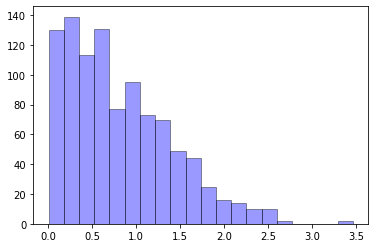

In [25]:
points = np.random.normal(0, 1, 
                 size=(1000, 1)) # вычисляем расстояние от 1000 точек в 1 мерном пространстве до 0
d = np.linalg.norm(points, axis=1)

sns.distplot(d, hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})

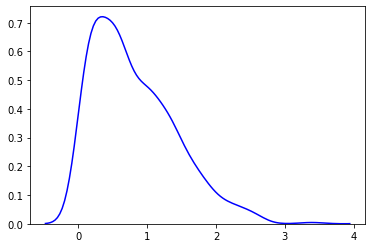

In [26]:
# АППРОКСИМАЦИЯ плотности распределение
sns.distplot(d, hist=False, kde=True, color = 'blue',
             hist_kws={'edgecolor':'black'})

### Постройте распределение расстояния от центра координат до точек для размерностей N=5, N=10, N=20 и N = 200 на одном графике.  Какие выводы можно сделать? 

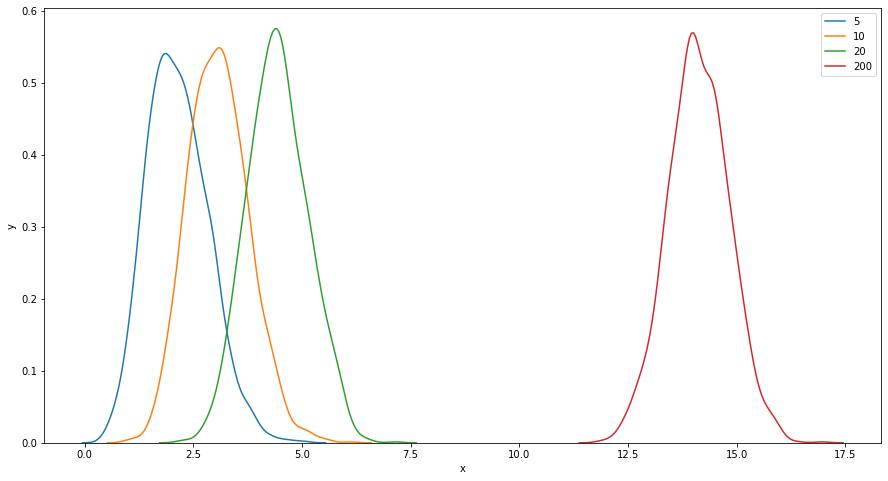

In [27]:
ras = [5, 10, 20, 200] 

plt.figure(figsize=(15, 8))

for i in ras:
    points = np.random.normal(0, 1, 
                 size=(2000, i))
    d = np.linalg.norm(points, axis=1)

    sns.distplot(d, hist=False, kde=True,
             hist_kws={'edgecolor':'black'}, label=str(i))
  
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

При увелечении N график распределений смещается вправо.

### * Объясните полученную картину с помощью теории вероятности. 

* Указание: подсчитайте вероятность того, что сумма квадратов N независимых нормальных величин будет меньше R^2 для некоторого фиксированного R. 
* Указание: В принципе, можете вывести формулу для квадратом равномерных. 

## *Повторите графики для равномерного распределения. 

In [28]:
np.random.uniform(low=-1, high=1, size=(5, 2)) # Пять точек из двумерного равномерного распределения, 
# каждая из компонент которого - равномерное распределение на отрезке от -1 до 1. 
# По-другому - точка имеет две координаты, координаты распределены независимо и равномерно на отрезке от 0 до 1

array([[-0.79563802,  0.94294197],
       [ 0.86726963, -0.2093487 ],
       [ 0.91437695,  0.7781268 ],
       [-0.19985885, -0.81518529],
       [ 0.60953707,  0.07439695]])

## Сфера радиуса R vs Сфера радиуса 2R 



In [29]:
np.random.uniform(low=-2, high=2, size=(5, 2)) # Пять точек из двумерного равномерного распределения, 
# каждая из компонент которого - равномерное распределение на отрезке от -1 до 1. 
# По-другому - точка имеет две координаты, координаты распределены независимо и равномерно на отрезке от 0 до 1

array([[ 1.82076836,  1.77810879],
       [-0.80393172, -1.67471549],
       [-0.1197782 ,  0.52980007],
       [-0.50589586,  1.00608313],
       [-1.0357129 , -1.53066988]])

In [30]:
def points_in_sphere(points, R): # https://en.wikipedia.org/wiki/N-sphere
    return np.sum(points * points, axis=1) < R 

In [31]:
dim = 5
eps = 0.1
p = np.random.uniform(low=-1, high=1, size=(10000000, dim))


r1 = points_in_sphere(p, 1).sum()
r1eps = points_in_sphere(p, 1 + eps).sum()

# Считаем отношение числа точек, попавших в сферу радиуса 1
# к числу точек, попадающих в сферу радиуса 1 + eps 
print(r1/r1eps)

# Считаем отношение числа точек, не попавших в сферу радиуса 1
# но попавших в сферу радиуса 1 + eps  к числу точек, попавших в сферу радиуса 1 + eps
print( (r1eps - r1)  / r1eps)

0.7890883489702556
0.21091165102974443


#### Постройте график зависимости этих двух величин от размерности пространства. Сделайте выводы

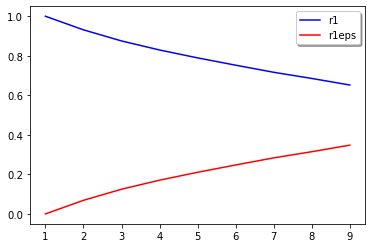

In [32]:
dims = []
ps = []
for i in range(1, 10):
    dims.append(i)
    ps.append(np.random.uniform(low=-1, high=1, size=(10000000, i)))

dims = np.array(dims)
eps = 0.1

r1s = []
r1eps = []

for p in ps:
    s1 = points_in_sphere(p, 1).sum()
    s1eps = points_in_sphere(p, 1 + eps).sum()
    r1s.append(s1/s1eps)
    r1eps.append((s1eps-s1)/s1eps)

r1s, r1eps = np.array(r1s), np.array(r1eps)

plt.plot(dims, r1s, color = 'blue', label = 'r1')
plt.plot(dims, r1eps, color = 'red', label = 'r1eps')
plt.legend(loc = 'upper right', shadow = True)
plt.show()

## * Попробуйте повторить что-то из выше перечисленного для другой метрики и опишите ваши наблюдения

In [33]:
def points_in_sphere(points, R):
    return np.sum(np.abs(points), axis=1) < R 

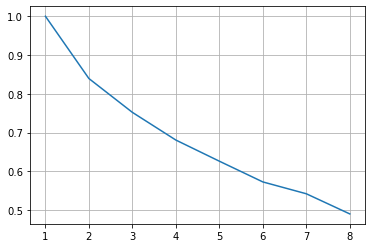

In [34]:
dim = np.arange(1, 9, 1)
ratio = []

for i in dim:
    p = np.random.uniform(low=-1, high=1, size=(1000000, i))
    
    r1 = points_in_sphere(p, 1).sum()
    r1eps = points_in_sphere(p, 1 + eps).sum()
    
    ratio.append(r1/r1eps)
    
plt.grid()
plt.plot(dim, ratio)

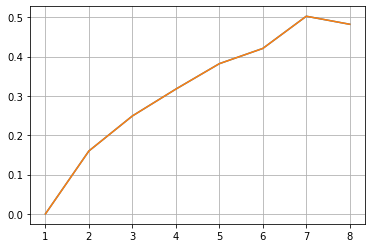

In [35]:
dim = np.arange(1, 9, 1)
ratio = []

for i in dim:
    p = np.random.uniform(low=-1, high=1, size=(1000000, i))
    
    r1 = points_in_sphere(p, 1).sum()
    r1eps = points_in_sphere(p, 1 + eps).sum()
    
    ratio.append((r1eps - r1)/r1eps)

plt.grid()
plt.plot(dim, ratio)
plt.plot(dim, ratio)

 Ведут себя схожим образом с предыдущей метрикой судя по графикам только сами графики менее гладкие.

# Bias-variance-tradeoff

In [36]:
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap

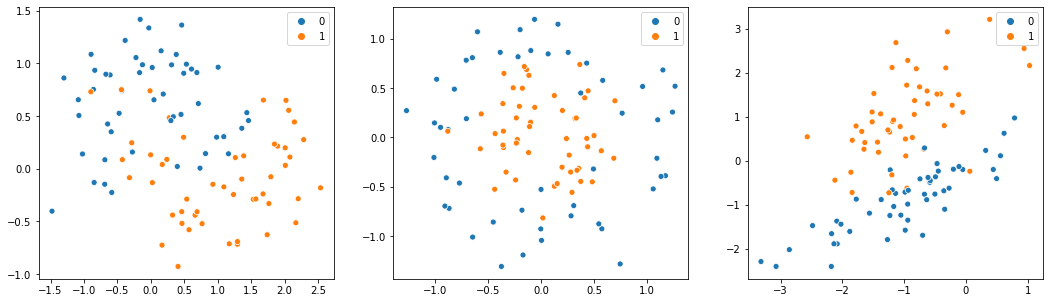

In [37]:


n_samples = 100

# Сгенерируем три различных искуственных датасета
f, axarr = plt.subplots(1, 3, figsize=(18, 5))

# два вложенных в друг друга серпа
points1, labels1 = make_moons(noise=0.3, random_state=371, n_samples=n_samples)
sns.scatterplot(points1[:, 0], points1[:, 1], hue=labels1, ax=axarr[0])

# концентрические окружности
points2, labels2 =  make_circles(noise=0.2, factor=0.5, random_state=371, n_samples=n_samples)
sns.scatterplot(points2[:, 0], points2[:, 1], hue=labels2, ax=axarr[1])

# просто две соприкасающихся группы точек 
points3, labels3 = make_classification(n_features=2, 
                                       n_redundant=0,
                                       n_informative=2,
                                       random_state=20, 
                                       n_clusters_per_class=1,
                                       flip_y=0.01, 
                                       n_samples=n_samples)
points3 = points3 + np.random.normal(0, 0.01, points3.shape)
sns.scatterplot(points3[:, 0], points3[:, 1], hue=labels3, ax=axarr[2])
plt.show()

Выберите датасет, который вам больше нравится.
Например, выберем первый

In [38]:
points, labels = points1, labels1 

In [39]:
n_nei = 1
classifier = KNeighborsClassifier(n_neighbors=n_nei)
classifier.fit(points, labels)

KNeighborsClassifier(n_neighbors=1)

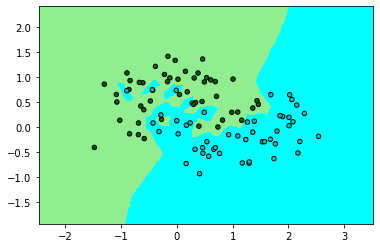

In [40]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
h = .02 # step size for plot grid


cmap_light = ListedColormap(['lightgreen', 'cyan'])
cmap_bold = ListedColormap(['darkgreen', 'c'])


x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### Визуализируйте decision boundary для разного числа соседей

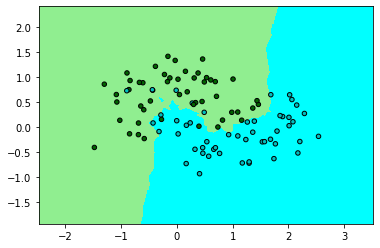

In [41]:
n_nei = 5
classifier = KNeighborsClassifier(n_neighbors=n_nei)
classifier.fit(points, labels)
h = .02 # step size for plot grid


cmap_light = ListedColormap(['lightgreen', 'cyan'])
cmap_bold = ListedColormap(['darkgreen', 'c'])


x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

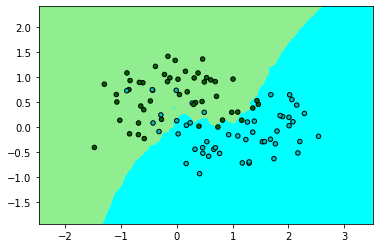

In [42]:
n_nei = 20
classifier = KNeighborsClassifier(n_neighbors=n_nei)
classifier.fit(points, labels)
h = .02 # step size for plot grid


cmap_light = ListedColormap(['lightgreen', 'cyan'])
cmap_bold = ListedColormap(['darkgreen', 'c'])


x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

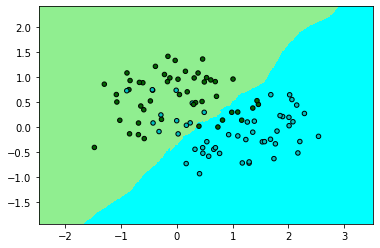

In [43]:
n_nei = 50
classifier = KNeighborsClassifier(n_neighbors=n_nei)
classifier.fit(points, labels)

h = .02 # step size for plot grid


cmap_light = ListedColormap(['lightgreen', 'cyan'])
cmap_bold = ListedColormap(['darkgreen', 'c'])


x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

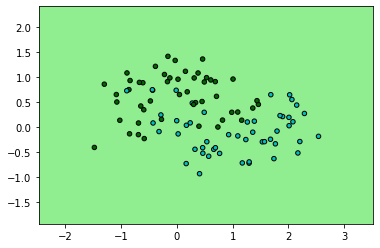

In [44]:
n_nei = 100
classifier = KNeighborsClassifier(n_neighbors=n_nei)
classifier.fit(points, labels)

h = .02 # step size for plot grid


cmap_light = ListedColormap(['lightgreen', 'cyan'])
cmap_bold = ListedColormap(['darkgreen', 'c'])


x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### Повторите такое же для KNN с weights="distance".

#### Сделайте вывод о зависимости bias и variance KNN в зависимости от числа соседей. 
#### Как влияет шум на bias/variance? 


Чем больше соседей тем bias больше, но variance меньше.Чем больше шум, тем больше variance и тем меньше bias.

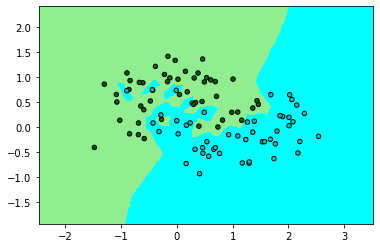

In [45]:
n_nei = 1
classifier = KNeighborsClassifier(n_neighbors=n_nei, weights="distance")
classifier.fit(points, labels)

h = .02 # step size for plot grid


cmap_light = ListedColormap(['lightgreen', 'cyan'])
cmap_bold = ListedColormap(['darkgreen', 'c'])


x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

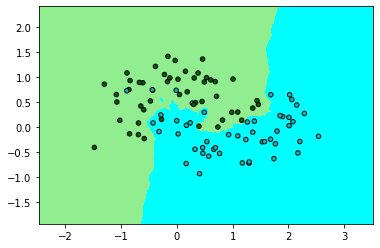

In [46]:
n_nei = 5
classifier = KNeighborsClassifier(n_neighbors=n_nei, weights="distance")
classifier.fit(points, labels)

h = .02 # step size for plot grid


cmap_light = ListedColormap(['lightgreen', 'cyan'])
cmap_bold = ListedColormap(['darkgreen', 'c'])


x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

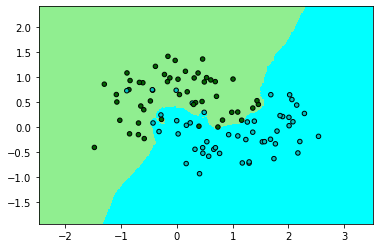

In [47]:
n_nei = 20
classifier = KNeighborsClassifier(n_neighbors=n_nei, weights="distance")
classifier.fit(points, labels)
h = .02 # step size for plot grid


cmap_light = ListedColormap(['lightgreen', 'cyan'])
cmap_bold = ListedColormap(['darkgreen', 'c'])


x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

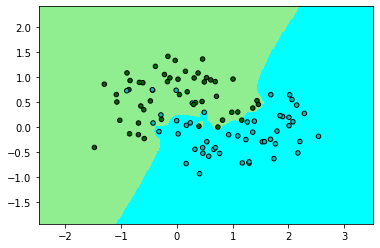

In [48]:
n_nei = 100
classifier = KNeighborsClassifier(n_neighbors=n_nei, weights="distance")
classifier.fit(points, labels)
h = .02 # step size for plot grid


cmap_light = ListedColormap(['lightgreen', 'cyan'])
cmap_bold = ListedColormap(['darkgreen', 'c'])


x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#### * Повторить такое же для KNN с weights=callable.

#### * Повторить это и для других датасетов. Построить набор графиков: колонка - датасет, строка - число соседей

In [49]:
def get_KNeighborsClassifier (ax, points = points1, labels = labels1, n_nei = 1, weights = 'uniform'): #функция для построения графиков с разными праметрами
    classifier = KNeighborsClassifier(n_neighbors=n_nei, weights=weights)
    classifier.fit(points, labels)

    h = .02 # step size for plot grid


    cmap_light = ListedColormap(['lightgreen', 'cyan'])
    cmap_bold = ListedColormap(['darkgreen', 'c'])


    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    #ax.figure()
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
    ax.scatter(points[:, 0], points[:, 1], c=labels, cmap=cmap_bold,
                    edgecolor='k', s=20)
    #ax.xlim(xx.min(), xx.max())
    #ax.ylim(yy.min(), yy.max())
    #plt.show()

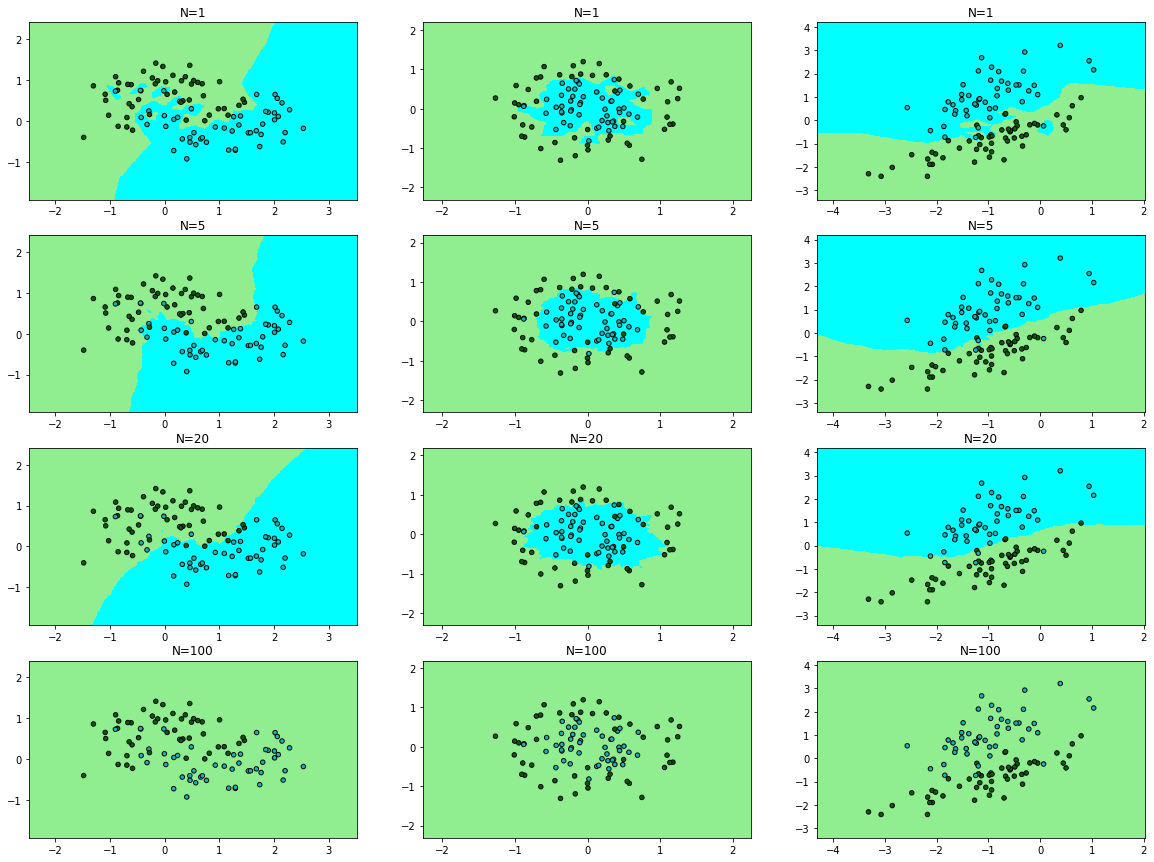

In [50]:
fig, axes = plt.subplots(4, 3)
fig.set_figheight(15)
fig.set_figwidth(20)

nei = [1, 5, 20, 100]

for i in range(4):
    for j in range(3):
        points = points1
        labels = labels1
        
        if (j == 1):
            points = points2
            labels = labels2
        
        if (j == 2):
            points = points3
            labels = labels3
        get_KNeighborsClassifier(points = points, labels = labels, n_nei = nei[i], ax = axes[i][j])
        axes[i][j].title.set_text('N=' + str(nei[i]))

plt.show()

## Качество классификатора 

In [51]:
# Для оценки качества классификатора используется множество различных метрик. 
# Будем использовать здесь две из них
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split # бьем на train и test

In [52]:
# два вложенных в друг друга серпа
n_samples = 200
X, y = make_moons(noise=0.3, random_state=371, n_samples=n_samples)

# бьем на обучение и тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
y_predicted = model.predict(X_test) # предсказываем класс

# accuracy - просто доля объектов, для которых мы верно указали класс
print(accuracy_score(y_true=y_test, y_pred=y_predicted)) 

0.9125


In [54]:
y_predicted = model.predict_proba(X_test) # предсказываем вероятность классов
print(y_predicted.shape)
y_predicted_1class = y_predicted[:, 1] # берем вероятности первого класса

(80, 2)


In [55]:
print(roc_auc_score(y_true=y_test, y_score=y_predicted_1class)) 

0.944027517198249


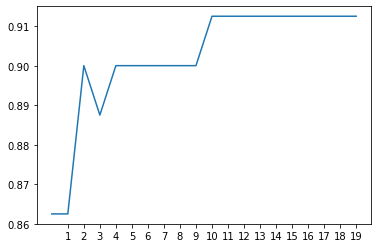

In [56]:
# строим зависимость accuracy от числа соседей,  weights="uniform"
max_n = 20
wu = np.zeros(max_n)

for n in range(1, max_n + 1):
    model = KNeighborsClassifier(n_neighbors=n, weights="distance")
    model.fit(X_train, y_train)
    
    y_predicted = model.predict(X_test)
    wu[n-1] = accuracy_score(y_true=y_test, 
                          y_pred=y_predicted)

plt.xticks(np.arange(1, max_n))
plt.plot(wu)

#### Выберите какой-то датасет и постройте для него зависимость accuracy и roc-auc от числа соседей для weights="uniform" и weights="distance". Выберите оптимальное число соседей. 

In [57]:
def get_accuracy(max_n = 20, weights = 'uniform'):
    wu = np.zeros(max_n)

    for n in range(1, max_n + 1):
        model = KNeighborsClassifier(n_neighbors=n, weights=weights)
        model.fit(X_train, y_train)

        y_predicted = model.predict(X_test)
        wu[n-1] = accuracy_score(y_true=y_test, 
                              y_pred=y_predicted)
    plt.figure(figsize=(10,6))
    #plt.xticks(np.arange(1, max_n))
    plt.grid()
    plt.xlabel('neighbors')
    plt.ylabel('accuracy')
    plt.plot(wu)

In [58]:
def get_rocauc(max_n = 20, weights = 'uniform'):
    wu = np.zeros(max_n)

    for n in range(1, max_n + 1):
        model = KNeighborsClassifier(n_neighbors=n, weights=weights)
        model.fit(X_train, y_train)

        y_predicted = model.predict_proba(X_test)
        y_predicted_1class = y_predicted[:, 1] 
        wu[n-1] = roc_auc_score(y_true=y_test, y_score=y_predicted_1class)

    plt.figure(figsize=(10,6))
    plt.grid()
    plt.xlabel('neighbors')
    plt.ylabel('roc_auc')
    plt.plot(wu)

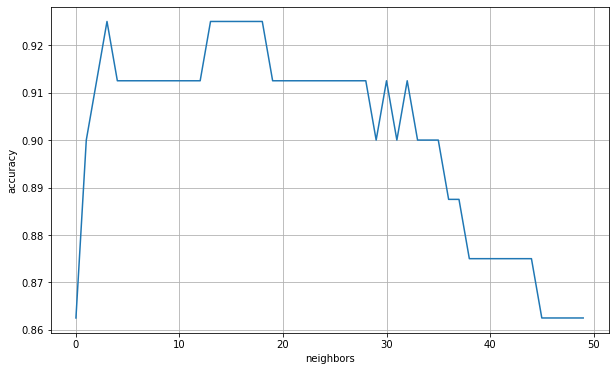

In [59]:
get_accuracy(max_n = 50, weights = 'uniform')

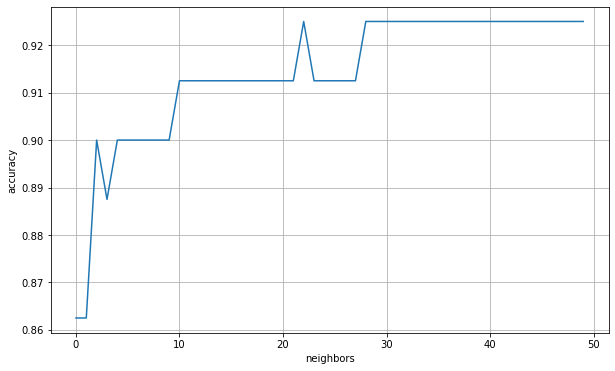

In [60]:
get_accuracy(max_n = 50, weights = 'distance')

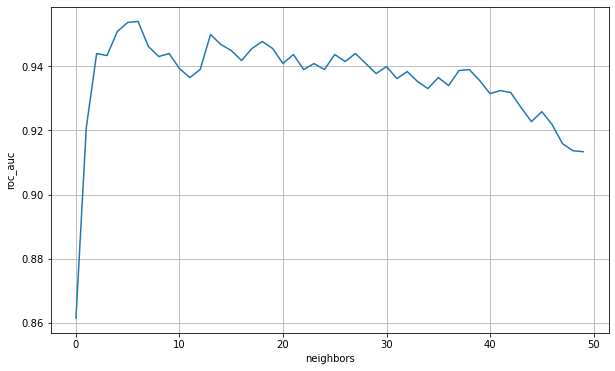

In [61]:
get_rocauc(max_n = 50, weights = 'uniform')

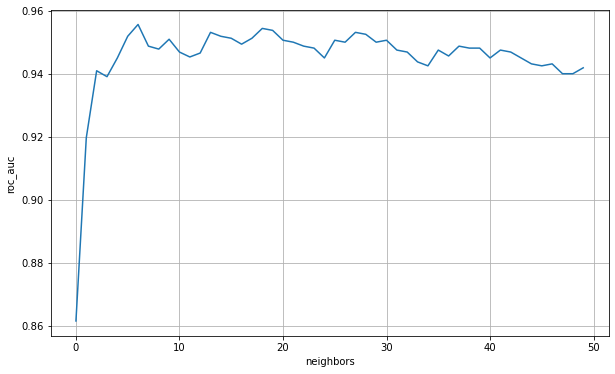

In [62]:
get_rocauc(max_n = 50, weights = 'distance')

Найболее лучшее число соседей около 15.

## Предсказываем значение функции с помощью KNN-регрессор

In [63]:
from mpl_toolkits.mplot3d import Axes3D # для 3d-визуализации в matplotlib
from matplotlib import cm 

In [64]:
gridspec_kw={'width_ratios': [3, 1]}

In [65]:
points[:, 1].min()

-2.4053079021850863

In [66]:
# пусть у нас будет функция от двух переменных
x1_min, x1_max = -2.5, 2.5
x2_min, x2_max = -2.5, 2.5
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

y = np.cos(x1) ** 2 + np.sin(x2) ** 2

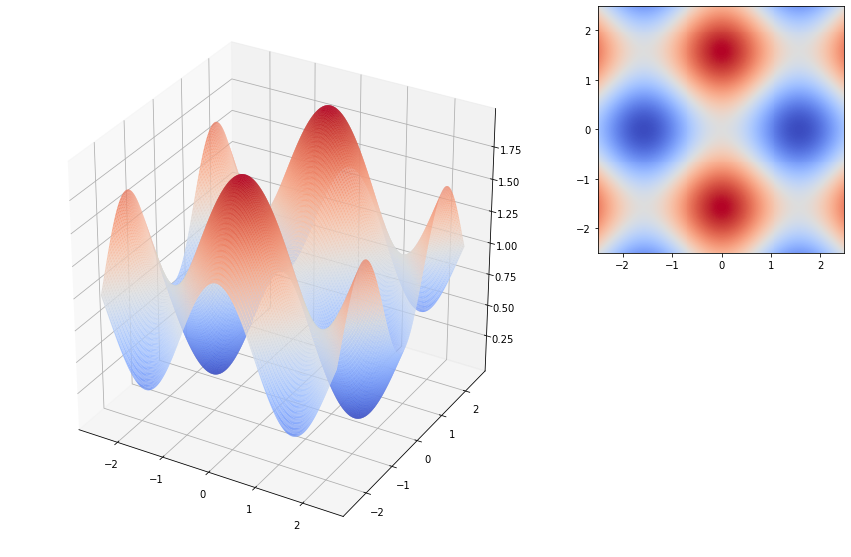

In [67]:
# Построим, как это выглядит 
plt.figure(figsize=(15,10))
# https://towardsdatascience.com/subplots-in-matplotlib-a-guide-and-tool-for-planning-your-plots-7d63fa632857 
ax = plt.subplot2grid((2, 3), (0, 0), rowspan=2, colspan=2, projection='3d') 

ax.plot_surface(x1, x2, y, cmap=cm.coolwarm, linewidth=0, rstride=1, cstride=1)

ax = plt.subplot2grid((2, 3), (0, 2), rowspan=1, colspan=1)
ax.pcolormesh(x1, x2, y, cmap=cm.coolwarm, )
plt.show()

In [68]:
x1.shape

(250, 250)

In [69]:
sample_size = 500

x1_sample = np.random.uniform(x1_min, x1_max, sample_size)
x2_sample = np.random.uniform(x2_min, x2_max, sample_size)

noise = np.random.normal(0, 0.2, sample_size)
y_sample = np.cos(x1_sample) ** 2 + np.sin(x2_sample) ** 2 + noise


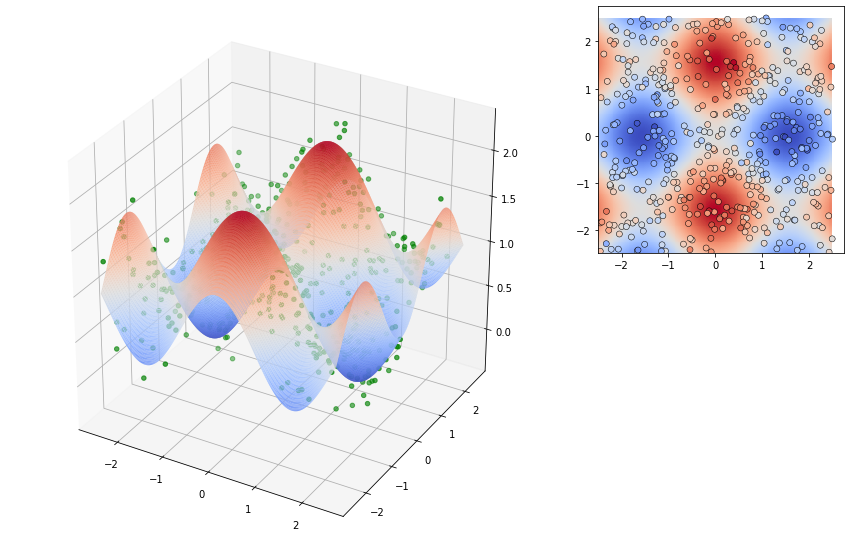

In [70]:
# Построим, как это выглядит 
plt.figure(figsize=(15,10))

ax = plt.subplot2grid((2, 3), (0, 0), rowspan=2, colspan=2, projection='3d') 

ax.plot_surface(x1, x2, y, cmap=cm.coolwarm, linewidth=1, rstride=1, cstride=1)
ax.scatter3D(x1_sample, x2_sample, y_sample, color='g')


ax = plt.subplot2grid((2, 3), (0, 2), rowspan=1, colspan=1)

ax.pcolormesh(x1, x2, y, cmap=cm.coolwarm)
ax.scatter(x1_sample, x2_sample, c=y_sample, cmap=cm.coolwarm, edgecolor='black', linewidth=0.5)
plt.show()

In [71]:
regressor = KNeighborsRegressor(n_neighbors=5, weights='distance')
X_sample = np.stack([x1_sample, x2_sample], axis=1) # make matrix
regressor.fit(X_sample, y_sample)

KNeighborsRegressor(weights='distance')

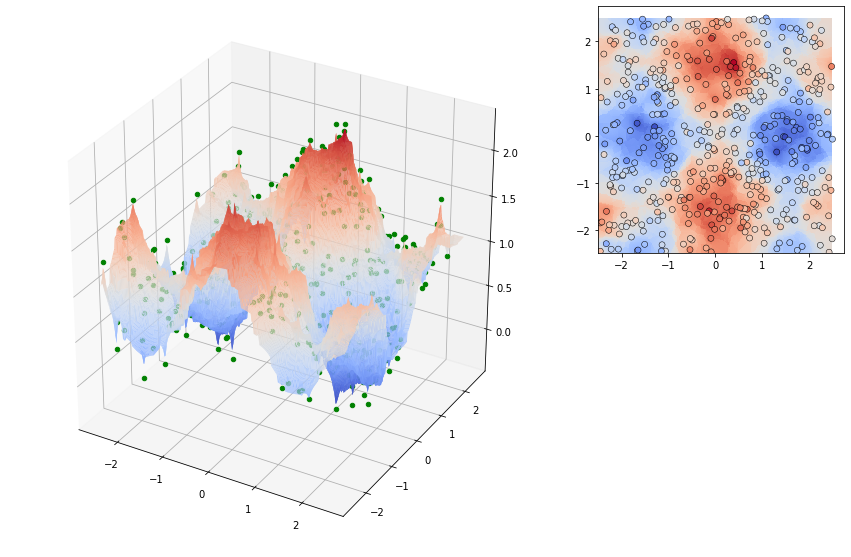

In [72]:
X = np.stack([np.ravel(x1), np.ravel(x2)], axis=1)
y_predicted = regressor.predict(X)
y_predicted = y_predicted.reshape(x1.shape[0], x1.shape[1])

# Построим, как это выглядит 
plt.figure(figsize=(15,10))

ax = plt.subplot2grid((2, 3), (0, 0), rowspan=2, colspan=2, projection='3d') 

ax.plot_surface(x1, x2, y_predicted, cmap=cm.coolwarm, linewidth=1, rstride=1, cstride=1)
ax.scatter3D(x1_sample, x2_sample, y_sample, color='g', depthshade=False)

ax = plt.subplot2grid((2, 3), (0, 2), rowspan=1, colspan=1)

ax.pcolormesh(x1, x2, y_predicted, cmap=cm.coolwarm)
ax.scatter(x1_sample, x2_sample, c=y_sample, cmap=cm.coolwarm, edgecolor='black',
           linewidth=0.5)
plt.show()

#### Изобразите, что получится для бОльшего числа соседей. В идеале - подберите число соседей, при котором функция будет воспроизводиться наиболее точно.

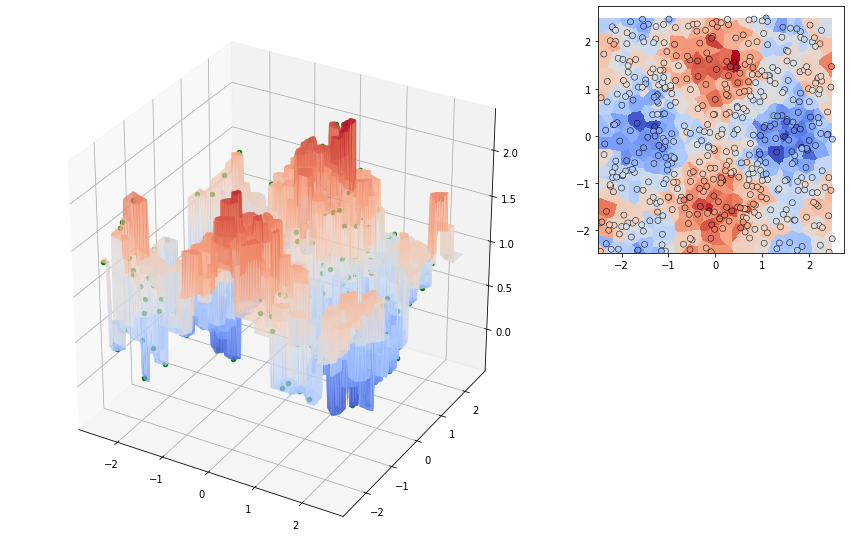

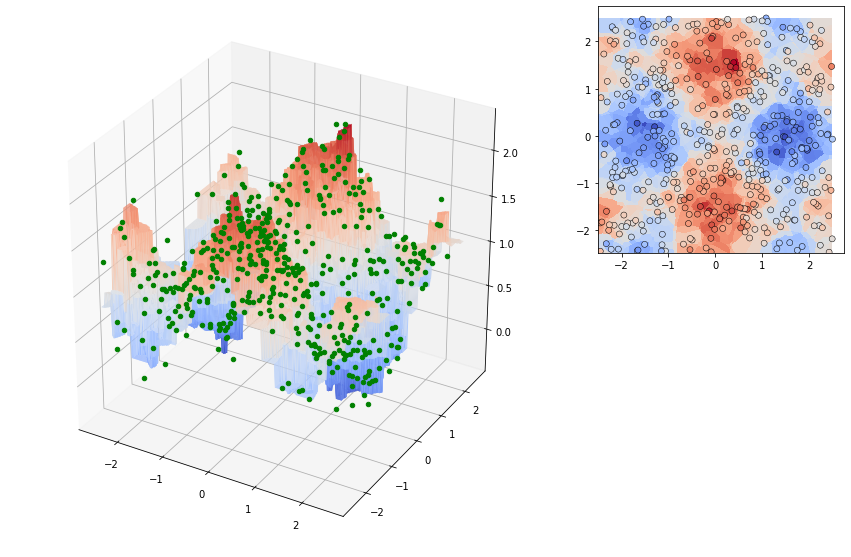

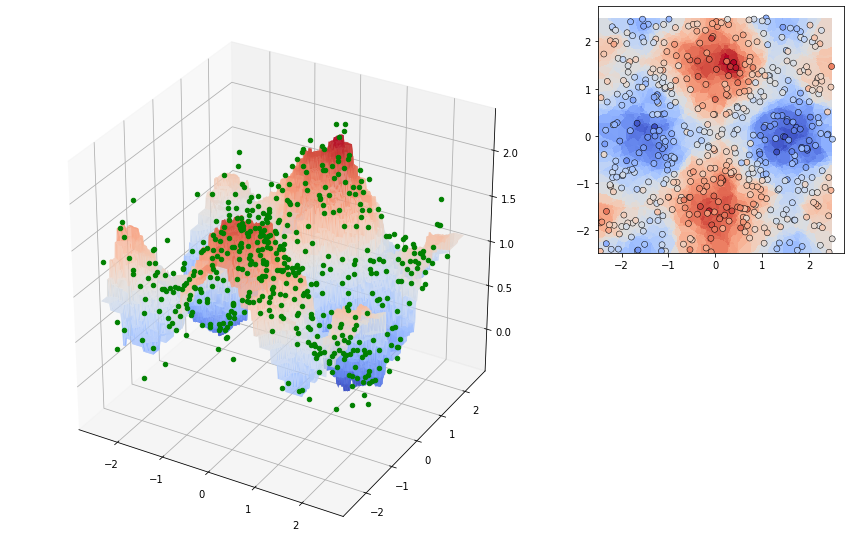

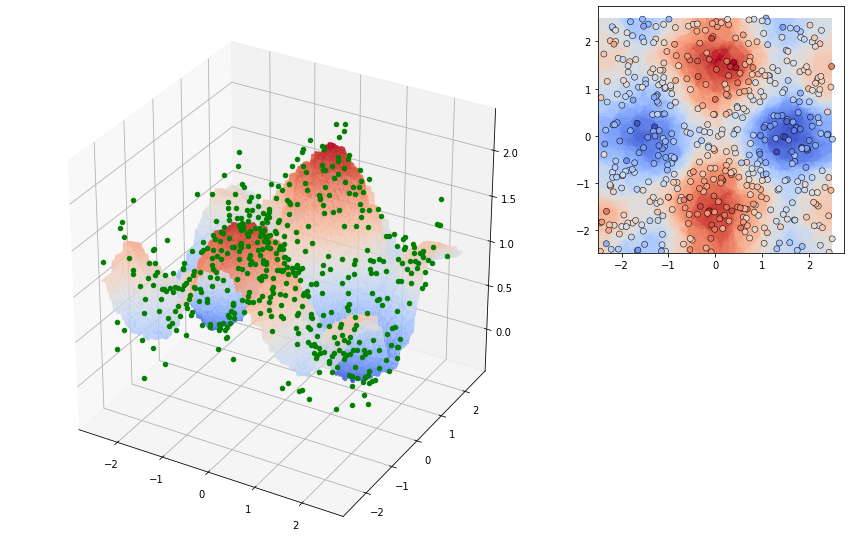

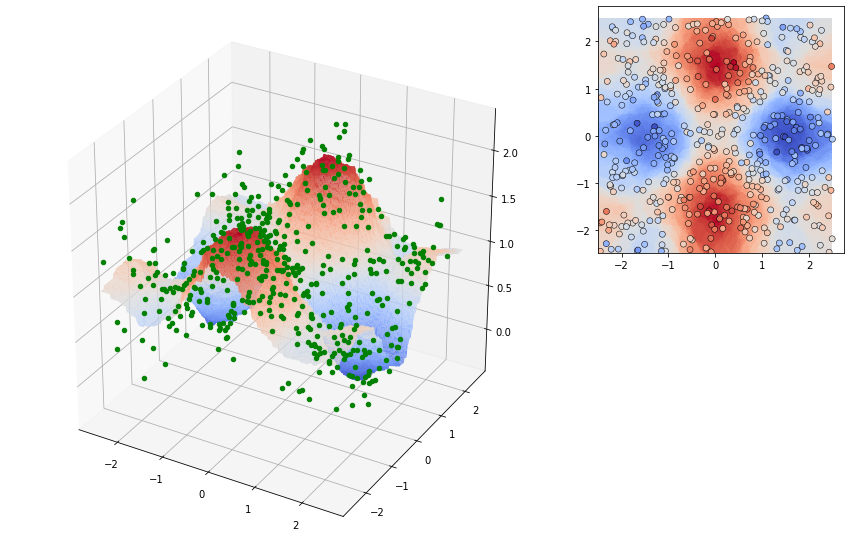

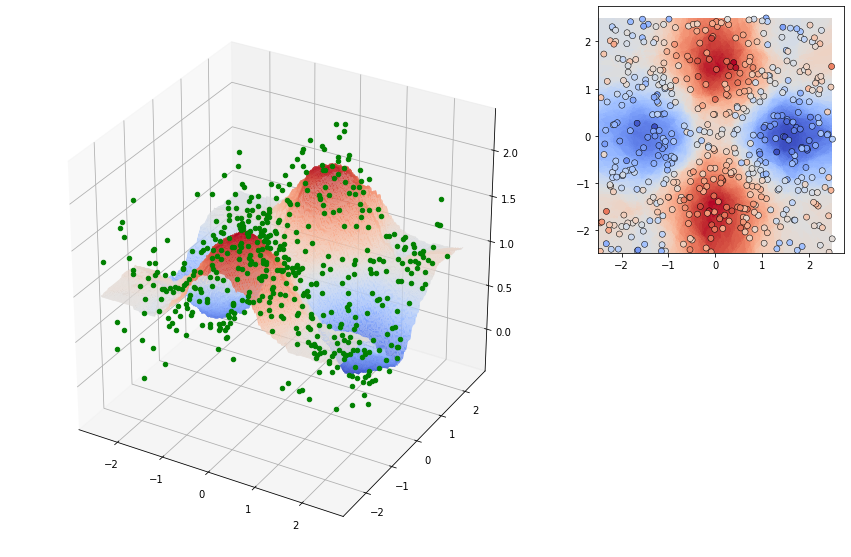

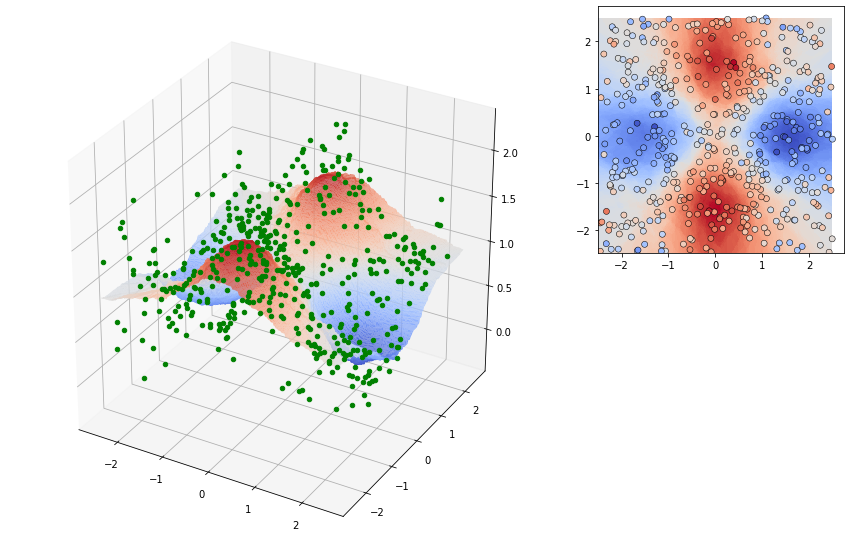

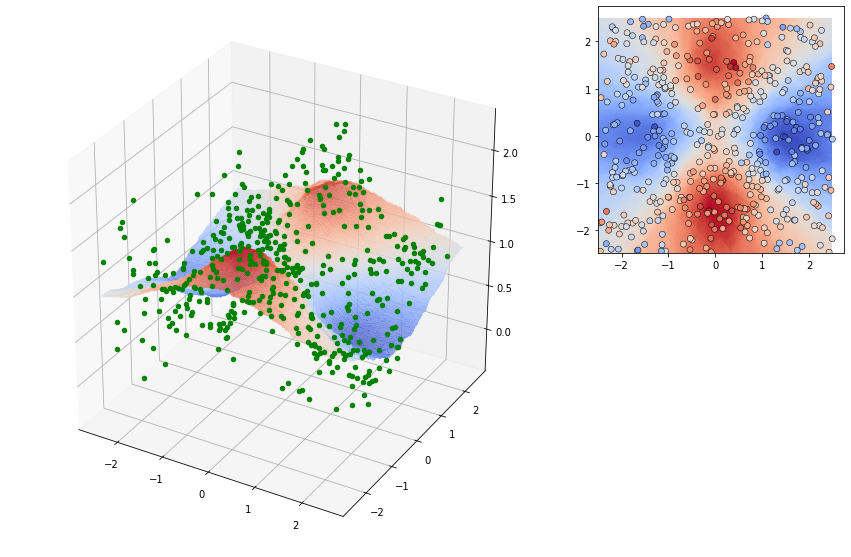

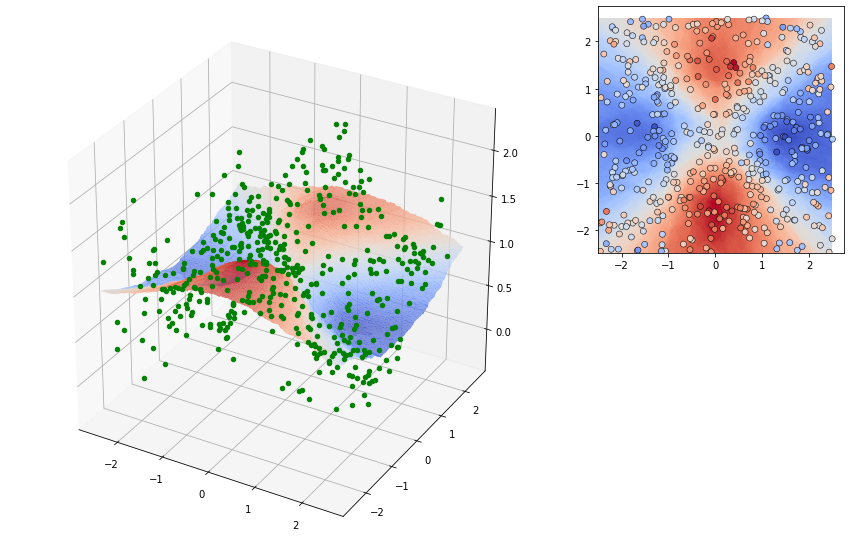

In [73]:
for i in([1, 2, 5, 10, 20, 30, 50, 70, 100]):
    regressor = KNeighborsRegressor(n_neighbors=i)
    X_sample = np.stack([x1_sample, x2_sample], axis=1) # make matrix
    regressor.fit(X_sample, y_sample)
    
    X = np.stack([np.ravel(x1), np.ravel(x2)], axis=1)
    y_predicted = regressor.predict(X)
    y_predicted = y_predicted.reshape(x1.shape[0], x1.shape[1])

    # Построим, как это выглядит 
    plt.figure(figsize=(15,10))

    ax = plt.subplot2grid((2, 3), (0, 0), rowspan=2, colspan=2, projection='3d') 

    ax.plot_surface(x1, x2, y_predicted, cmap=cm.coolwarm, linewidth=1, rstride=1, cstride=1)
    ax.scatter3D(x1_sample, x2_sample, y_sample, color='g', depthshade=False)

    ax = plt.subplot2grid((2, 3), (0, 2), rowspan=1, colspan=1)

    ax.pcolormesh(x1, x2, y_predicted, cmap=cm.coolwarm)
    ax.scatter(x1_sample, x2_sample, c=y_sample, cmap=cm.coolwarm, edgecolor='black',
           linewidth=0.5)
    plt.show()

#### Аналогично изобразите, что получится, если поставить параметр weights="distance".В идеале - подберите число соседей, при котором функция будет воспроизводиться наиболее точно. 

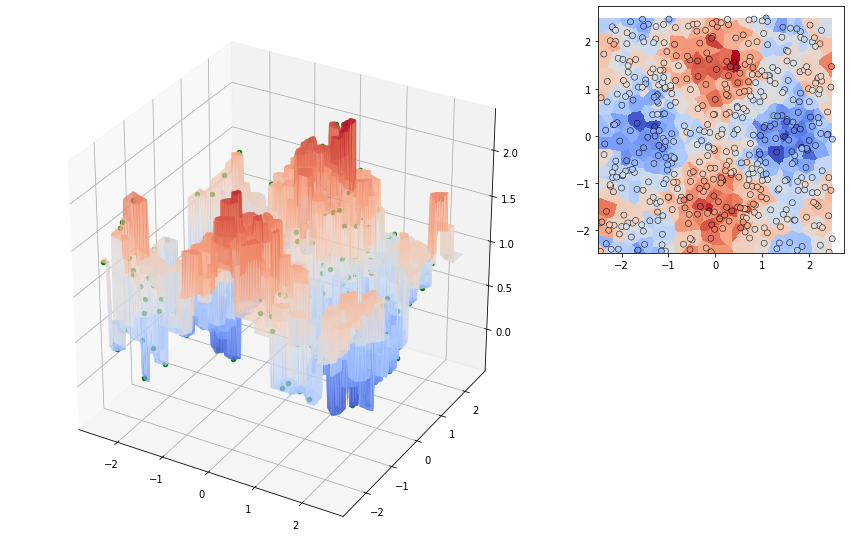

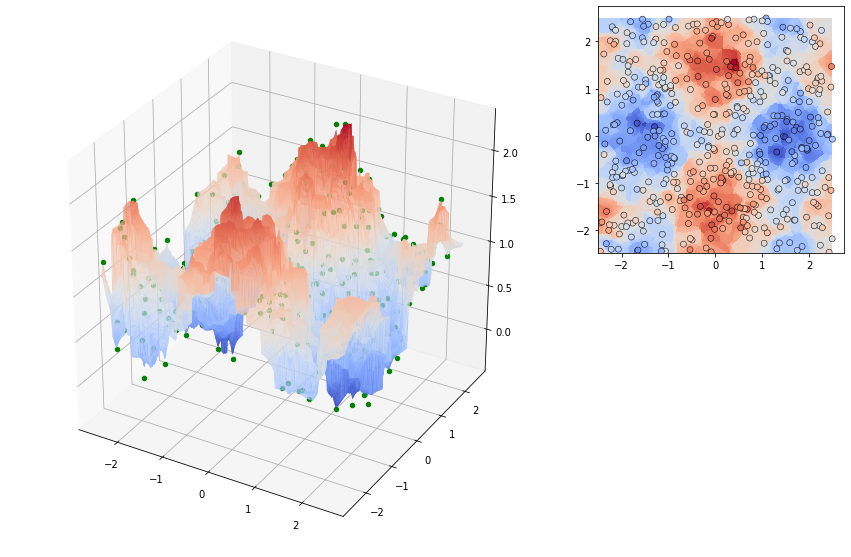

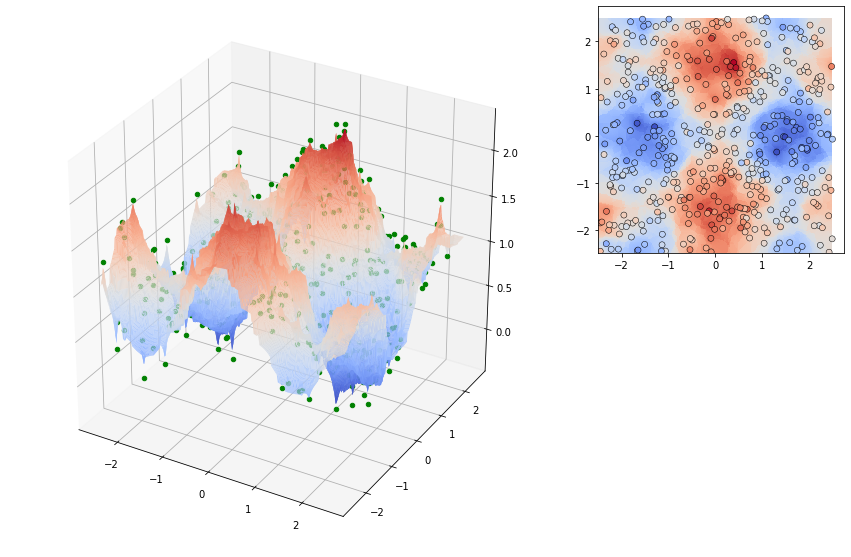

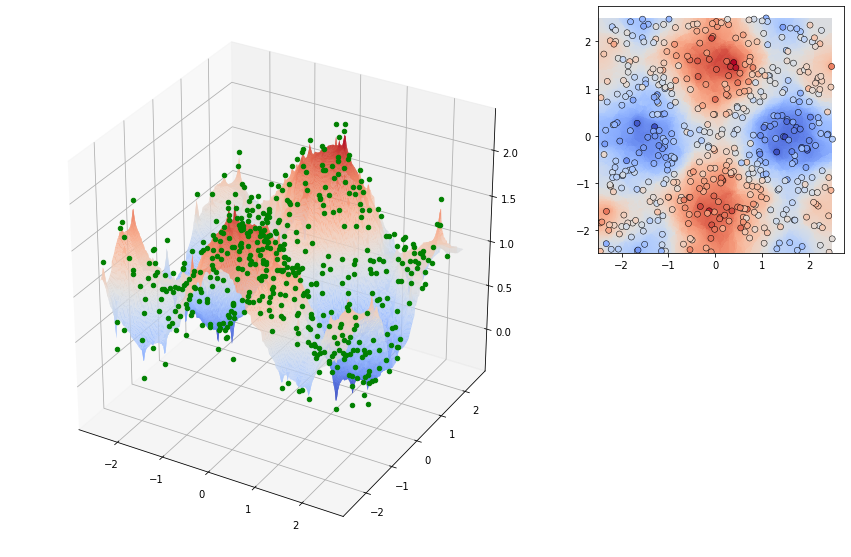

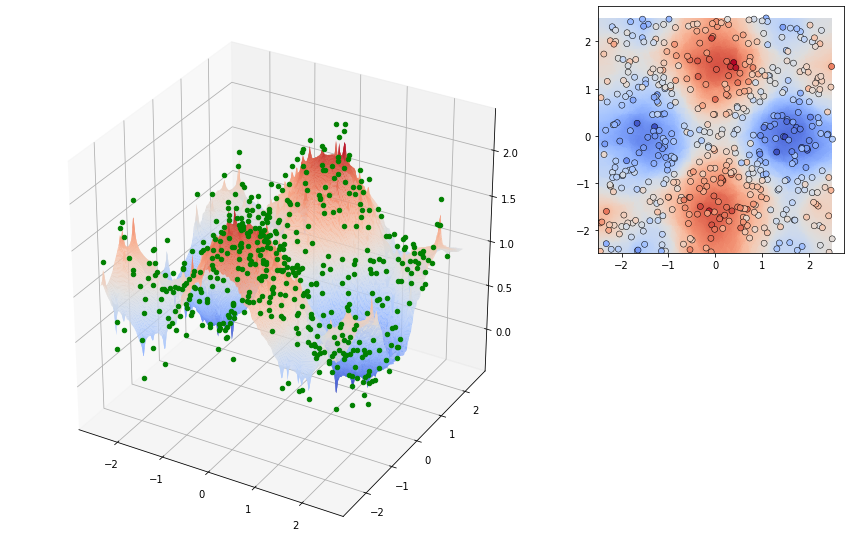

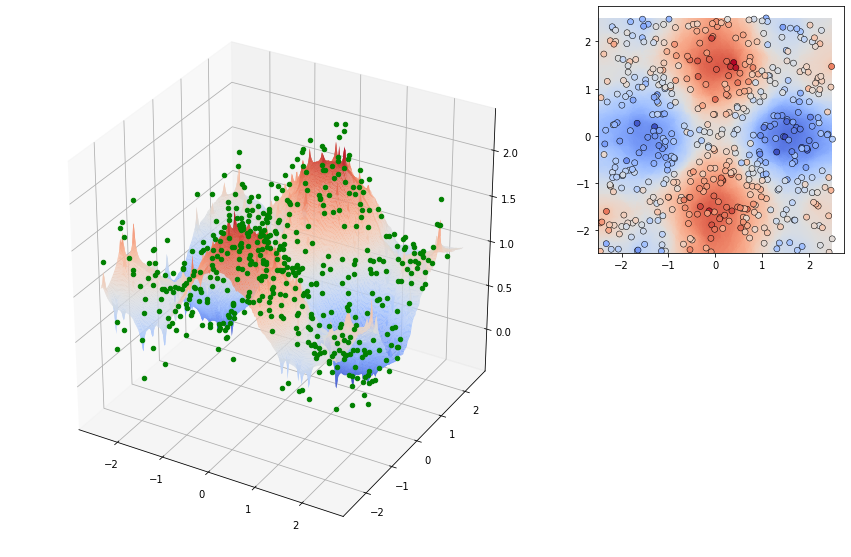

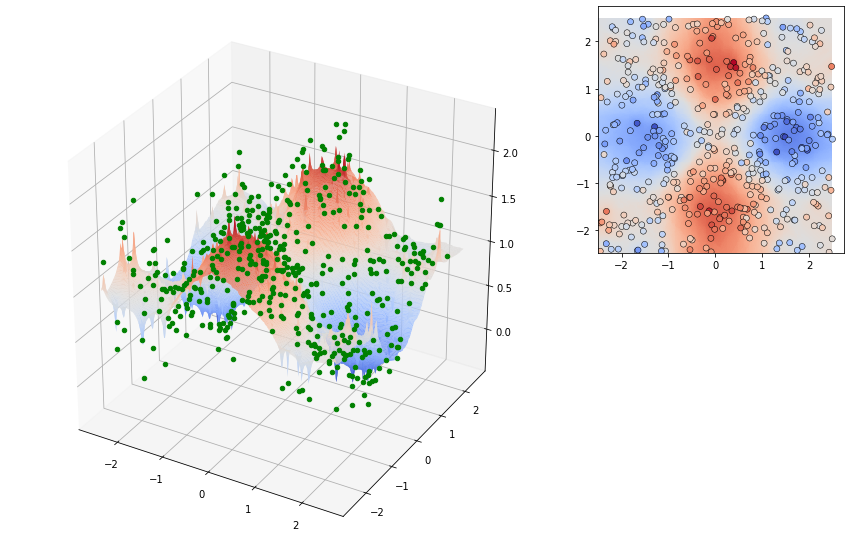

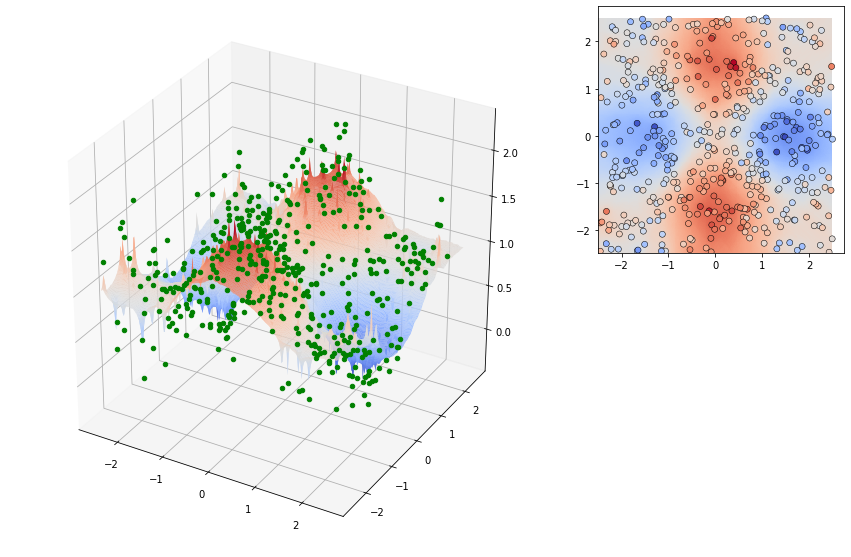

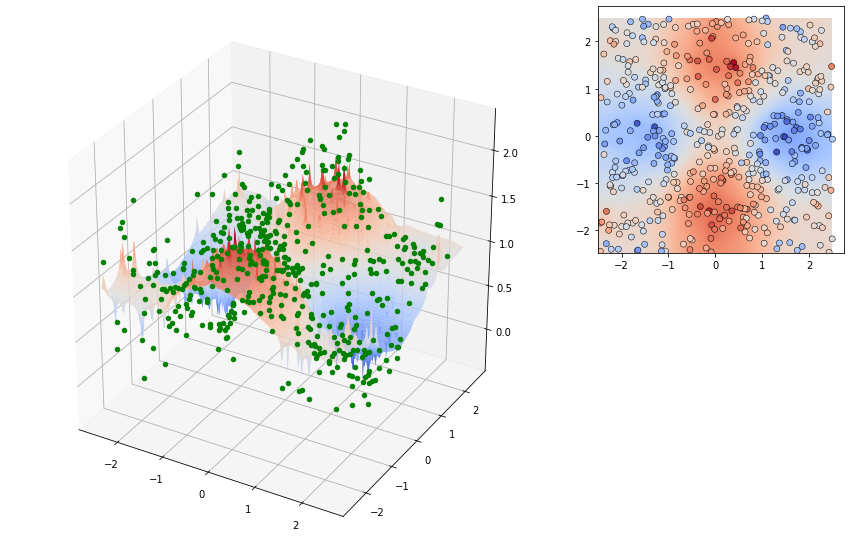

In [74]:
for i in([1, 2, 5, 10, 20, 30, 50, 70, 100]):
    regressor = KNeighborsRegressor(n_neighbors=i, weights='distance')
    X_sample = np.stack([x1_sample, x2_sample], axis=1) # make matrix
    regressor.fit(X_sample, y_sample)
    
    X = np.stack([np.ravel(x1), np.ravel(x2)], axis=1)
    y_predicted = regressor.predict(X)
    y_predicted = y_predicted.reshape(x1.shape[0], x1.shape[1])

    # Построим, как это выглядит 
    plt.figure(figsize=(15,10))

    ax = plt.subplot2grid((2, 3), (0, 0), rowspan=2, colspan=2, projection='3d') 

    ax.plot_surface(x1, x2, y_predicted, cmap=cm.coolwarm, linewidth=1, rstride=1, cstride=1)
    ax.scatter3D(x1_sample, x2_sample, y_sample, color='g', depthshade=False)

    ax = plt.subplot2grid((2, 3), (0, 2), rowspan=1, colspan=1)

    ax.pcolormesh(x1, x2, y_predicted, cmap=cm.coolwarm)
    ax.scatter(x1_sample, x2_sample, c=y_sample, cmap=cm.coolwarm, edgecolor='black',
           linewidth=0.5)
    plt.show()

## Качество регрессионной модели

In [75]:
# Можно считать MSE - Mean Squared Error, 
# можно MAE - Mean Absolute Error (https://en.wikipedia.org/wiki/Mean_absolute_error) 
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Мы будем далее использовать MAE (у нас y часто меньше 1, удобнее).
# Можете использовать MSE, если интересно. 

# разбиение выборки на обучение и тест
# в принципе, мы можем в данном синтетическом примере не использовать этого, 
# а использовать _sample и grid
# но в реальности, конечно, всех данных о функции у вас нет. Только немного данных, которые вы бьете
# на трэйн и тест 
from sklearn.model_selection import train_test_split

In [76]:
y = np.ravel(y) # перевести двумерный массив y в одномерный

# опять же, обычно соотношение train и test берут не 0.01/0.995, а, например, 3:2
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.995) 


In [77]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
print(mean_absolute_error(y_true=y_test, 
                          y_pred=y_predicted))

0.07710900113234079


In [78]:
model = KNeighborsRegressor(n_neighbors=3, weights="distance")
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
print(mean_absolute_error(y_true=y_test, 
                          y_pred=y_predicted))

0.06453830205031807


Постройте на одном графике зависимость mse модели от числа соседей для weights="uniform" (стоит по-умолчанию) и для weights="distance" на одном графике. Выберите оптимальное число соседей. Что лучше себя показывает - weights="uniform" или weights="distance"?

In [79]:
def get_mse(max_n = 15):
    mse_u = np.zeros(max_n)
    mse_d = np.zeros(max_n)

    for n in range(1, max_n + 1):
        model_u = KNeighborsRegressor(n_neighbors=n, weights='uniform')
        model_u.fit(X_train, y_train)
        
        model_d = KNeighborsRegressor(n_neighbors=n, weights='distance')
        model_d.fit(X_train, y_train)

        y_predicted_u = model_u.predict(X_test)
        y_predicted_d = model_d.predict(X_test)
        
        mse_u[n-1] = mean_squared_error(y_true=y_test, 
                          y_pred=y_predicted_u)
        mse_d[n-1] = mean_squared_error(y_true=y_test, 
                          y_pred=y_predicted_d)
    plt.figure(figsize=(10,6))
    plt.grid()
    plt.xlabel('neighbors')
    plt.ylabel('MSE')
    plt.plot(mse_u, label = 'uniform')
    plt.plot(mse_d, label = 'distance')
    plt.legend()

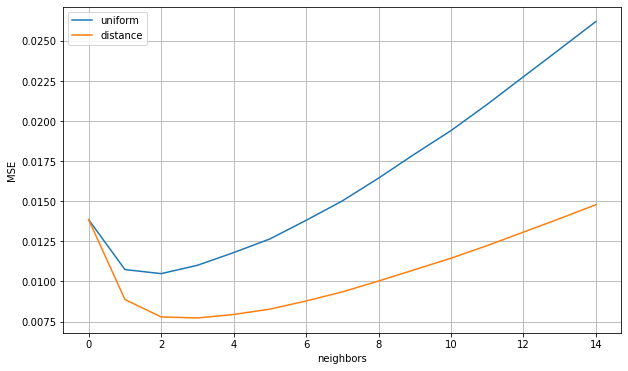

In [80]:
get_mse()

Проверьте, как будет влиять изменения среднего шума, добавляемого к реальным значениям y на переобучение

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.995) 

In [82]:
y_train = y_train + np.random.normal(0, 0.3, len(y_train)) #make some noise!

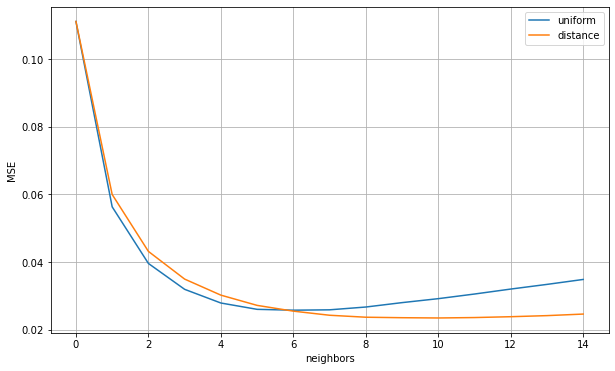

In [83]:
get_mse()

MSE увеличивается при добавлении шума к значениям, но модель будет переобучаться на этот шум при этом качество будет падать .